# <center> 2017 机器学习第三次作业</center>
|学号| 姓名    |    分工   | 工作量 |
|--------|--------|-------------|------|
|1401111344| 张尉东  | 任务1,2      |33.33%|
|1701210057| 王海燕  | 任务1,2      |33.33%|
|1701111326| 张明悦  | 任务1,2      |33.33%|

## 1. 概念定义及数据预处理

### (a.) 概念定义:    
- **活跃作者**: 我们将2007至2017年分为三段```[2007, 2011), [2011, 2015), [2015, 2018)```, 并将活跃作者定义为三个阶段都出现的作者;
- **团队**: 经常性在一起合作的学者称之为**团队**;
- **频繁团队**: 至少一起发表过3篇以上论文的团队称之为**频繁团队**.

### (b.) 数据结构定义:
定义类型```class Article```, 将数据读入内存并存放在数组```articles```中, 代码如下:

In [15]:
class Article:
    def __init__(self, str):
        self.authors = []
        lines = str.split('\n')
        for line in lines:
            if line is '' or line is None or line == "":
                continue
            key, value = line.split('\t', 1)
            if key == 'author':
                self.authors.append(value)
            elif key == 'title':
                self.title = value
            elif key == 'year':
                self.year = int(value)
            elif key == 'Conference':
                self.conference = value
    
    def display(self):
        str = ' '.join(self.authors) + ':' + self.title + ',' + self.conference
        print(str)
    
    
def parse_article(filename):
    fin = open(filename)
    content = fin.read()
    blocks = content.split('#########')
    articles = []
    for block in blocks:
        if block is '' or block is None or block == "":
            continue
        art = Article(block)
        # art.display()
        articles.append(art)
    return articles
        
articles = parse_article('data/FilteredDBLP.txt')

## 2. 活跃作者挖掘
(**任务1.1**: 根据时间信息，判定哪些人依然活跃，哪些人不再活跃。)

### (a.) 活跃作者挖掘及存储
我们将挖掘出的活跃作者存储在一个```active_authors_years = dict()```结构体中, 其结构为:
```python
{'authorname':[year1, year2, ...]}
```

### (b.) 结果展示
- ***活跃作者***: 如表2.1所示, 我们找出了所有活跃作者, 限于篇幅, 仅列出了部分活跃作者;
- ***作者的活跃程度***: 如图2.1所示的散列图, 表示越活跃的作者(出现次数越多), 散列点越大;
- ***连续活跃程度***: 如图2.2所示的活动轨迹图, 我们将活跃的作者(至少出现5次以上)依据其出现的年份连成一条活跃年份图.

                                  表2.1 活跃作者及活跃年份                   
Total number: 1326
Index    Author Name                         Years     
-----    -------------                       --------- 
0        Tomaso A. Poggio                    {2016, 2017, 2009, 2011, 2012, 2013, 2015}
1        Wolfgang Heidrich                   {2016, 2017, 2008, 2009, 2010, 2011, 2012,...
2        Lior Wolf                           {2016, 2017, 2007, 2008, 2010, 2011, 2013,...
3        Chirag Shah                         {2016, 2017, 2007, 2008, 2010, 2011, 2012, 2014}
4        Gaurav Sharma 0004                  {2016, 2010, 2012, 2013}
5        Peter Knees                         {2007, 2013, 2014, 2015}
6        Noam Hazon                          {2016, 2008, 2009, 2011, 2013, 2014}
7        Peter Mika                          {2009, 2011, 2015}
8        Bodo Rosenhahn                      {2016, 2017, 2007, 2008, 2009, 2010, 2011,...
9        Changhe Yuan                        {2016, 2007, 20

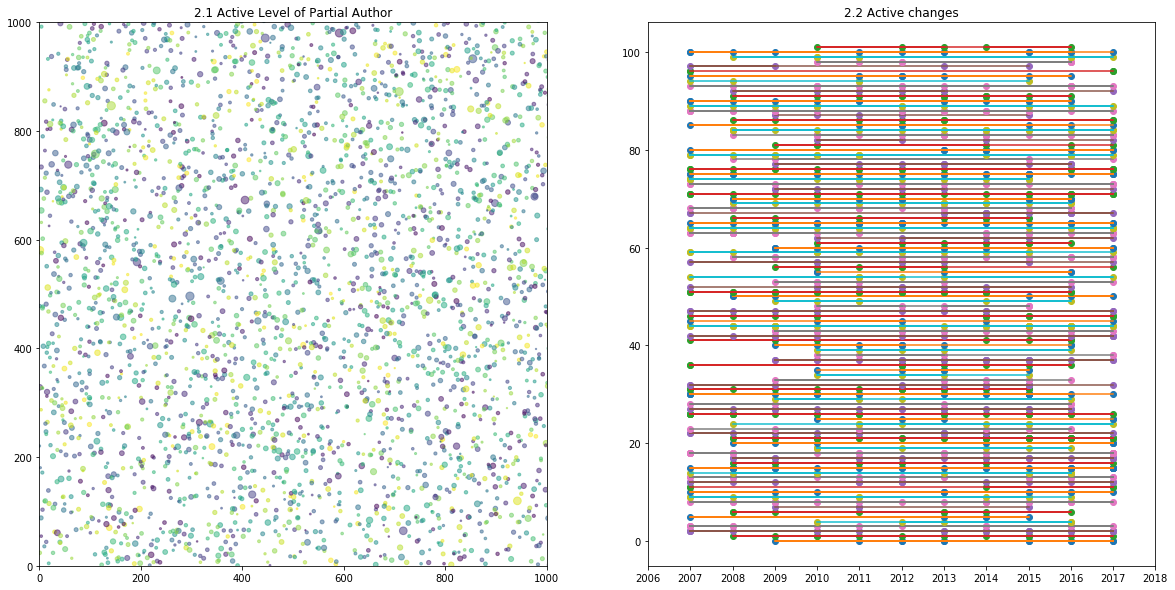

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import textwrap

# Fixing random state for reproducibility
np.random.seed(19680801)

def find_active_author(articles):
    # Statistics the number of author occurences and years
    author_years = dict()
    for article in articles:
        for author in article.authors:
            if author in author_years:
                author_years[author].append(article.year)
            else:
                author_years[author] = [article.year]
    active_author_years = dict()
    for idx, kv in enumerate(author_years.items()):
        key, value = kv
        if len(value) > 3 and min(value) in range(2007, 2011) and max(value) in range(2015, 2018) and np.median(value) in range(2011, 2015):
            active_author_years[key] = value
    return active_author_years

def display_active_authors(active_author_years, num):
    print("{:<33} {:<33}".format('', '表2.1 活跃作者及活跃年份'))
    print('Total number:',len(active_author_years))
    # formatly output the active auth, only output 50 items
    print("{:<8} {:<35} {:<10}".format('Index','Author Name','Years'))
    print("{:<8} {:<35} {:<10}".format('-----','-------------','---------'))
    for idx, kv in enumerate(active_author_years.items()):
        key, value = kv
        print("{:<8} {:<35} {:<10}".format(
            idx, key, textwrap.shorten(str(set(value)), width=50, placeholder='...')))
        if idx > num:
            print('... ...')
            break

# 1. display the active authors and their active years
active_author_years = find_active_author(articles)
display_active_authors(active_author_years, 30)

# 2. plot the ative level  
fig1 = plt.figure(figsize=(20,10))
def plot_active_level(active_author_years):
    N = len(articles)
    x = np.random.rand(N) * 3000
    y = np.random.rand(N) * 3000
    colors = np.random.rand(N)
    # 0 to 15 point radii
    area = np.pi * (15 * np.array([len(years)/100.0 for years in active_author_years.keys()]))**2

    ax1 = fig1.add_subplot(121)
    # ax1.xlim(0, 500)
    ax1.set_xlim([0, 1000])
    ax1.set_ylim([0, 1000])
    ax1.scatter(x, y, s=area, c=colors, alpha=0.5)
    ax1.set_title('2.1 Active Level of Partial Author')
    ax1.legend(numpoints=1, loc='upper left')

# 3. plot the ative changes  
def plot_active_changes(active_author_years, num):
    ax2 = fig1.add_subplot(122)
    ax2.set_title('2.2 Active changes')
    ax2.set_xlim([2006, 2018])
    years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
    ax2.set_xticks(years)
    
    for idx, active_author_years in enumerate(active_author_years.items()):
        author, years = active_author_years
        ax2.plot(years, np.ones(len(years)) * idx, 'o', years, np.ones(len(years)) * idx, '-')
        if (idx > num):
            break

plot_active_level(active_author_years)
plot_active_changes(active_author_years, 100)
plt.show()

## 3. 频繁项挖掘
(**任务1.2**: 经常性在一起合作的 学者，将之称为‘团队’, 根据研究者合作发表论文次数为根据 进行频繁模式挖掘，找出三个人以上的‘团队’.)

### (a.) 频繁项挖掘: 找出支持度support>=5的所有学者

In [3]:
from pymining import itemmining

def display_active_teams(active_teams, minimum_author, records):
    print("{:<28} {:<33}".format('', '表3.1 团队人数>=' + str(minimum_author) + ', 合作次数>=5的团队'))
    print("Total number: " + str(len(active_teams)))
    # print('The number of active teams:',len(active_teams))
    # formatly output the active auth, only output 50 items
    print("{:<8} {:<35}".format('Index','Author Name'))
    print("{:<8} {:<35}".format('-----','-------------','---------'))
    counter = 0
    for idx,authors in enumerate(active_teams):
        if len(authors) >= minimum_author:  
            print("{:<8} {:<35}".format(counter, ', '.join(authors)))
            counter += 1
        if counter > records:
            print('... ...')
            break

authors = [article.authors for article in articles]
relim_input = itemmining.get_relim_input(authors)
report = itemmining.relim(relim_input, min_support=5)
display_active_teams(report, 1, 10)

                             表3.1 团队人数>=1, 合作次数>=5的团队         
Total number: 5985
Index    Author Name                        
-----    -------------                      
0        Janusz Konrad                      
1        Takahiro Okabe                     
2        Anton Milan                        
3        David Zhang 0001                   
4        Nalini K. Ratha                    
5        Andrea Albarelli, Andrea Torsello  
6        J. Andrew Bagnell                  
7        Talal Rahwan, Tomasz P. Michalak, Nicholas R. Jennings
8        J. Benton                          
9        Özgür Ulusoy, Rifat Ozcan, Ismail Sengör Altingövde
10       Michael Zakharyaschev, Alessandro Artale
... ...


### (b.) 找出合作者个数>=3的所有合作团队

In [4]:
display_active_teams(report, 3, 10)

                             表3.1 团队人数>=3, 合作次数>=5的团队         
Total number: 5985
Index    Author Name                        
-----    -------------                      
0        Talal Rahwan, Tomasz P. Michalak, Nicholas R. Jennings
1        Özgür Ulusoy, Rifat Ozcan, Ismail Sengör Altingövde
2        Jianping Yin, Xinwang Liu, Lei Wang 0001
3        Shant Karakashian, Berthe Y. Choueiry, Robert J. Woodward
4        Jun Xiao 0001, Fei Wu 0001, Yueting Zhuang
5        Zhe Gan, Lawrence Carin, Chunyuan Li
6        Xueqi Cheng, Yanyan Lan, Jun Xu, Jiafeng Guo
7        Yunchen Pu, Lawrence Carin, Chunyuan Li
8        Chuan Luo, Shaowei Cai, Kaile Su   
9        Shlomo Zilberstein, XiaoJian Wu, Daniel Sheldon
10       Deng Cai, Xiaofei He, Yueting Zhuang, Zhou Zhao
... ...


## 4. 主题挖掘
(**任务2.1**: 先定出主题词， 然后根据每个‘团队’发表的论文的情况，提炼出这个团队最常涉猎的主题。)

### (a.) 根据Latent Dirichlet allocation(LDA)主题模型训练出所有的模型:
我们将主题数设置为20, 经过LDA模型聚类, 我们得到了如表4.1所示的模型, 及其代表性的词.

In [5]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

def train_ldamodel(articles):
    tokenizer = RegexpTokenizer(r'\w+')

    # create English stop words list
    en_stop = get_stop_words('en')

    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()

    # compile sample documents into a list
    titles = [article.title for article in articles]
    doc_set = []
    for title in titles:
        doc_set.append(title)

    # list for tokenized documents in loop
    texts = []

    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]

        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

        # add tokens to list
        texts.append(stemmed_tokens)

    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(texts)

    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]

    # generate LDA model
    ldamodel = gensim.models.ldamodel.LdaModel(
        corpus, num_topics=20, id2word = dictionary, passes=20)
    return corpus, ldamodel

corpus, ldamodel = train_ldamodel(articles)

### (b.) 确定主题及主题词

In [6]:
ldamodel.print_topics()
ldamodel.show_topic(10)
print("{:<33} {:<33}".format('', '表4.1 20个主题及主题下的关键词'))
print("Total number: 20")
for i in range(2):
    topic_terms1 = ldamodel.show_topic(i * 5)
    topic_terms2 = ldamodel.show_topic(i * 5 + 1)
    topic_terms3 = ldamodel.show_topic(i * 5 + 2)
    topic_terms4 = ldamodel.show_topic(i * 5 + 3)
    topic_terms5 = ldamodel.show_topic(i * 5 + 4)
    #print(topic_terms1)
    print("{:<20} {:<22} {:<20} {:<20} {:<22}".format('Topic-' + str(i * 5), 
        'Topic-' + str(i * 5 + 1), 'Topic-'+ str(i * 5 + 2), 'Topic-'+ 
        str(i * 5 + 3), 'Topic-'+ str(i * 5 + 4)))
    print("{:<20} {:<22} {:<20} {:<20} {:<22}".format(
        '----------','----------','----------','----------','----------'))
    print("{:<12} {:<8} {:<12} {:<8} {:<12} {:<8} {:<12} {:<8} {:<12} {:<8}".format(
        'Term','Prob','Term','Prob','Term','Prob','Term','Prob','Term','Prob',))
    print("{:<12} {:<8} {:<12} {:<8} {:<12} {:<8} {:<12} {:<8} {:<12} {:<8}".format(
        '-----','-----','-----','-----','-----','-----','-----','-----','-----','-----',))
    for term_prob1, term_prob2, term_prob3, term_prob4, term_prob5 in zip(
        topic_terms1, topic_terms2, topic_terms3, topic_terms4, topic_terms5):
        # term1, prob1 = term_prob1
        print("{:<12} {:<8} {:<12} {:<8} {:<12} {:<8} {:<12} {:<8} {:<12} {:<8}".format(
            term_prob1[0], "{0:.3f}".format(term_prob1[1]), term_prob2[0], "{0:.3f}".format(term_prob2[1]), 
            term_prob3[0], "{0:.3f}".format(term_prob3[1]), term_prob4[0], "{0:.3f}".format(term_prob4[1]), 
            term_prob5[0], "{0:.3f}".format(term_prob5[1])))
    if i== 0:
        print('\n')

                                  表4.1 20个主题及主题下的关键词               
Total number: 20
Topic-0              Topic-1                Topic-2              Topic-3              Topic-4               
----------           ----------             ----------           ----------           ----------            
Term         Prob     Term         Prob     Term         Prob     Term         Prob     Term         Prob    
-----        -----    -----        -----    -----        -----    -----        -----    -----        -----   
logic        0.056    select       0.063    variat       0.030    map          0.042    structur     0.093   
program      0.045    camera       0.050    invari       0.028    data         0.037    shape        0.053   
linear       0.037    featur       0.049    dataset      0.022    measur       0.032    learn        0.040   
set          0.034    pose         0.043    level        0.022    consist      0.029    model        0.032   
dynam        0.032    recommend    0.

### (c.) 确定团队经常涉猎的主题
使用映射 `作者<--->标题<--->主题` 将作者经常所涉猎的主题进行关联:

In [7]:
topics = ldamodel.get_topics()
# print(ldamodel.show_topic(19, topn=3))
doc2topics = ldamodel.get_document_topics(corpus)

print("{:<25} {:<35}".format('', '表4.2 研究团队经常涉猎的主题及其主题下的关键词'))
print("Total number: " + str(len(doc2topics)))
print("{:<50} {:<22} {:<35}".format('Team memebers', 'Topic IDs', 'Topic Terms'))
print("{:<50} {:<22} {:<35}".format('----------------','---------', '-----------------------'))
for idx, article in enumerate(articles[:10]):
    max_prob_topic = 0
    max_prob = 0.0
    # Find the topic_id with maximum probability
    topic_id_str = ""
    for topic_id, prob in doc2topics[idx]:
        topic_id_str += str(topic_id) + ","
        if prob > max_prob:
            max_prob = prob
            max_prob_topic = topic_id
    topic_terms = [topic_prob[0] for topic_prob in ldamodel.show_topic(max_prob_topic, topn=3)]
    print("{:<50} {:<22} {:<35}".format(
        textwrap.shorten(', '.join(article.authors), width=50, placeholder="..."), 
        topic_id_str, ', '.join(topic_terms)))

                          表4.2 研究团队经常涉猎的主题及其主题下的关键词          
Total number: 27454
Team memebers                                      Topic IDs              Topic Terms                        
----------------                                   ---------              -----------------------            
Miroslaw Truszczynski, Stefan Woltran              0,1,5,14,              logic, program, linear             
Guibing Guo, Jie Zhang, Neil Yorke-Smith           7,13,15,19,            search, local, game                
Xinwang Liu, Yong Dou, Jianping Yin, Lei Wang...   3,9,14,17,18,          map, data, measur                  
Mickey Brautbar, Michael J. Kearns, Umar Syed      0,3,5,8,10,17,         map, data, measur                  
Shirin Sohrabi, Anton V. Riabov, Octavian Udrea    5,10,14,               learn, model, track                
Maximilian Nickel, Lorenzo Rosasco, Tomaso A....   3,7,10,16,             learn, adapt, embed                
Kyle Lund, Sam Dietrich, Scott Chow, J

## 5. 关联规则及序列规则挖掘: 团队和主题随着时间而动态变化
(**任务2.2**: 根据自己所定的时间段(五年，三年，两年或是一年)描述团队的构成状况以及其研究主题的变化情况。)

由支持度(support)和置信度(confidence)公式:

    - support (X -> Y )= P(X & Y) = X ∪ Y / N
    - confidence (X -> Y )= P(X & Y)/P(X) = X ∪ Y / X
    
我们可以得知, 在本应用中置信度小于1.0的关规则, 实际上可以将 X 看做团队基本成员, 将 Y 看做团队变化的成员, 从而就可以观察出团队成员的变化情况.

### (a.) 团队构成状况的变化
- **使用频繁项挖掘(Frequent Item Set Mining)**:首先找出至少出现5次, 人数为两个或两个以上作者的组合;
- **使用关联规则挖掘(Association Rules Mining)**: 找出所有关联规则中, 置信度小于1.0的规则, 根据年份变化观察团队的变化.

In [20]:
from pymining import itemmining, assocrules, perftesting

# 1. 找出至少出现5次, 两个或两个以上作者的组合
def find_team_with2(active_teams, minimum_author, records):
    counter = 0
    for idx,authors in enumerate(active_teams):
        if len(authors) >= minimum_author:  
            counter += 1
        if counter > records:
            print('... ...')
            break

# 2. 在二维图上画出团队结构随年份变化的曲线
def plot_teammember_changes(rules, num):
    print("{:<25} {:<35}".format('', '表5.1 团队构成状况变化'))
    print("Total number: " + str(len(rules)))
    print("{:<35} {:<28} {:<10}".format('团队固定成员', '变化成员', '置信度'))
    print("{:<35} {:<35} {:<15}".format('----------------','-------------------', '------'))
    counter = 0
    for rule in rules:
        permanent_member, variable_member, _, confidence = rule
        if confidence < 1.0:
            print("{:<35} {:<30} {:<15}".format(
                textwrap.shorten(', '.join(permanent_member), width=50, placeholder='...'), 
                textwrap.shorten(', '.join(variable_member), width=30, placeholder='...'),
                confidence))
            counter += 1
        if counter > num:
            break
    print('... ...')

rules = assocrules.mine_assoc_rules(report, min_support=5, min_confidence=0.9)
# rules
plot_teammember_changes(rules, 20)

                          表5.1 团队构成状况变化                      
Total number: 1050
团队固定成员                              变化成员                         置信度       
----------------                    -------------------                 ------         
Jun Xu                              Xueqi Cheng, Yanyan Lan,...    0.9230769230769231
Jun Xu                              Xueqi Cheng, Yanyan Lan        0.9230769230769231
Ruiping Wang 0001, Xilin Chen       Shiguang Shan                  0.9            
Lidan Shou                          Gang Chen 0001, Ke Chen 0005   0.9090909090909091
Gang Chen 0001, Lidan Shou          Ke Chen 0005                   0.9090909090909091
Stefano Ermon, Carla P. Gomes       Bart Selman                    0.9166666666666666
Min Zhang 0006                      Yiqun Liu, Shaoping Ma         0.9            
Yiqun Liu, Min Zhang 0006           Shaoping Ma                    0.9473684210526315
Jun Xu                              Xueqi Cheng, Jiafeng Guo       0.9230

### (b.) 团队研究主题的变化
由映射`作者<--->文章标题<--->主题`, 我们可以根据文章主题的变化描述出团队研究主题的变化情况.

- 与5(a)节类似, 我们首先根据置信度找出活跃的团队, 然后再找出这些团队相关的文章, 进而描绘出团队研究主题的变化.

In [1]:
from operator import itemgetter

# Find the active teams with member >= 3, occurence >= 5
def find_active_teams(report, records):
    active_teams = []
    counter = 0
    for team in report:
        if len(team) > 3:
            active_teams.append([author for author in team])
            counter += 1
        if counter > records:
            break
    return active_teams

active_teams = find_active_teams(report, len(report))

# find the doc ids of active team
def get_activeteams_doc(articles, records):
    # print("articles length:" + str(len(articles)))
    # print("active_teams length:" + str(len(active_teams)))
    counter = 0
    docs_of_activeteams = dict()
    for doc_idx, article in enumerate(articles):
        if len(article.authors) > 3:
            flag = False
            for team_idx, active_team in enumerate(active_teams):
                if article.authors < active_team:
                    # print(article.authors)
                    if team_idx in docs_of_activeteams:
                        docs_of_activeteams[team_idx].append(doc_idx)
                    else:
                        docs_of_activeteams[team_idx] = [doc_idx]
        counter += 1
        if counter > records:
            break
    return docs_of_activeteams

# We just get some demonstration docs
docs_of_activeteams = get_activeteams_doc(articles, 100)

# Get the specified team's topic_ids and corresponding years
def get_activeteam_topic_changes(team_id, articles, docs_of_activeteams):
    # print(len(docs_of_activeteams))
    # for idx, docs_of_activeteam in enumerate(docs_of_activeteams.items()):
    topic_ids = []
    years  = []
    if team_id in docs_of_activeteams:
        doc_ids = docs_of_activeteams[team_id]
        for doc_id in doc_ids:
            doc_year = articles[doc_id].year
            sorted_doc2topics = sorted(doc2topics[doc_id], key=lambda tup:(-tup[1], tup[0]))
            # Retrieve the first three topics with maximum probability
            #if len(sorted_doc2topics) > 5:
            topic_ids.extend([topic_id for topic_id, prob in sorted_doc2topics])
            years.extend([doc_year for i in range(len(sorted_doc2topics))])
        # print(str(topic_ids) + " " + str(years))
    return topic_ids, years

# Figure preparation
fig, axs = plt.subplots(6,4, figsize=(16, 18), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
# plt.suptitle('Topic changes of active teams', fontsize=16)

for idx, team_id in enumerate(docs_of_activeteams.keys()):
    axs[idx].set_xlabel('Year')
    axs[idx].set_ylabel('Topic Id')
    axs[idx].set_xlim([2007, 2018])
    if team_id in docs_of_activeteams:
        topics, years = get_activeteam_topic_changes(team_id, articles, docs_of_activeteams)
        # print(str(len(topics)) + " " + str(len(years)))
        axs[idx].plot(years, topics, 'o', years, topics, '-')
    #break

# plot_topic_changes(articles, docs_of_activeteams)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-e63ebbd9f4ca>", line 15, in <module>
    active_teams = find_active_teams(report, len(report))
NameError: name 'report' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/ultratb.py", line 1090, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.5/dist-pa

NameError: name 'report' is not defined